### Here I attempt to define the state encoding and decoding for coupled spring mass system defined in paper : https://arxiv.org/pdf/2303.13012.pdf

##### According to paper method 2 the state is defined as 
$$|\psi(0)\rangle = \frac{1}{\sqrt{2E}} \begin{bmatrix} \sqrt{M}\dot{\vec{x}}(0) \\ i\vec{\mu}(0) \end{bmatrix} \text{ and  } |\psi(t)\rangle = \frac{1}{\sqrt{2E}} \begin{bmatrix} \sqrt{M}\dot{\vec{x}}(t) \\ i\vec{\mu}(t) \end{bmatrix} $$ where $$M = \begin{bmatrix} m_{1} & & \\
    & \ddots & \\
    & & m_{N} \end{bmatrix}_{NxN} \text{ and  } \vec{\mu}(0) = \begin{pmatrix}  \mid \\ \sqrt{k_{ij}} (x_i - x_j) \\ \mid \\ \sqrt{k_{jj}}x_{j} \\ \mid \end{pmatrix}_{\frac{N(N-1)}{2}+Nx1}  \text{ where j>i }$$

Since encoding and decoding the state is same, I will be attempting to encode the initial state for a simple case and try to read the state through measurement, the same principle will apply for state at time t

Three pieces of information for intial state:
- $|\psi(0)\rangle = \frac{1}{\sqrt{2E}} \begin{bmatrix} \sqrt{M}\dot{\vec{x}}(0) \\ i\vec{\mu}(0) \end{bmatrix} \text{ and  } |\psi(t)\rangle = \frac{1}{\sqrt{2E}} \begin{bmatrix} \sqrt{M}\dot{\vec{x}}(t) \\ i\vec{\mu}(t) \end{bmatrix} $ where $dim(|\psi\rangle) = N + M | M = N(N+1)/2$
- $\mathcal{W}|0\rangle \rightarrow |\psi(0) \text{ where } dim(\mathcal{W}) = MxM$
- for the case below intial state = $|0\rangle^{\otimes q}|-\rangle$ where $q = poly(n)$

All this correspond to same initial state but $N+M$ is not of form $2^n$ and we don't know the relation between $q$ and $N+M$. From pg. 10 Appendix A.1. we pad B with zeroes to make it of dimension $N x N^2$, following this logic we pad the intial state such that $dim(|\psi(0)\rangle) = N+N^2$ which also means that $q = N+N^2-1$

#### Case : $$d = 1, E = 1, n = 2 \implies N = 4, \text{ no. of springs = 4 }, m_i = 1 \forall i \in [1,N], k_{i,j} = 1, j>i, \forall (i,j) \in [1,4]$$
$$\dot{\vec{x}}(0) = \begin{bmatrix} 1 \\ -1 \\ 0 \\  0 \end{bmatrix} \text{ and } \vec{x} = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \end{bmatrix}$$ 

In [30]:
import numpy as np

In [31]:
N = 4
m = 1
E = 1
#mass matrix
M = np.diag(np.full(N,m)) 
#position vector
x = np.zeros(4)
#velocity vector
x_dot = np.array([1,-1,0,0])
#K matrix (spring constants)
K = np.array(([1,1,0,0],[1,0,1,0],[0,1,0,1],[0,0,1,0]))
#y_dot vector
y_dot = np.matmul(np.transpose(x_dot),np.sqrt(M))
#mu vector
mu = []
for i in range(len(K)):
    for j in range(len(K[0])):
        if j>i:
            mu.append(np.sqrt(K[i][j])*(x[i]-x[j]))
        elif j==i:
            mu.append(np.sqrt(K[j][j])*x[j])
if len(mu)==(N*(N+1)/2):
    print("mu vector is formed correctly")
print("M = ",M)
print("x_dot = ",x_dot,"y_dot = ",y_dot, "mu = ", mu)

mu vector is formed correctly
M =  [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
x_dot =  [ 1 -1  0  0] y_dot =  [ 1. -1.  0.  0.] mu =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


# State Preparation 

In [32]:
#intial state vector
psi0 = []
psi0 = np.concatenate([y_dot,i*np.array(mu)])/np.sqrt(2*E)
print("psi0 = ",psi0, "size_of_psi0 = ",len(psi0))

psi0 =  [ 0.70710678 -0.70710678  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ] size_of_psi0 =  14


In [33]:
#making dimesion of q suitable with padding zeros
dim = int(N+(N*(N+1)/2))
while not(dim and (not(dim & (dim - 1)))): #checking of it is a power of 2
    dim+=1
    
num_qbits = int(np.log2(dim))
print(num_qbits)

4


In [35]:
from qiskit import QuantumCircuit, QuantumRegister

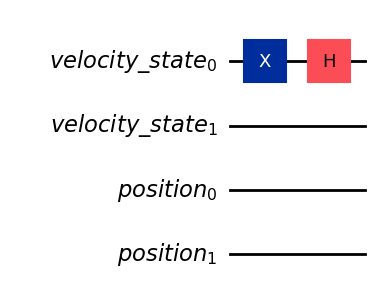

In [69]:
# circuit for psi0_cir according to q =1 
q = int(np.log2(N))
l = num_qbits-q
q_reg2 = QuantumRegister(l, name = "position")
q_reg1 = QuantumRegister(q,name = "velocity_state")
psi0_cir = QuantumCircuit(q_reg1,q_reg2)
psi0_cir.x(0)
psi0_cir.h(0)
psi0_cir.draw()

# To check the accuracy of output against a classical solution 
## Method 1 : CSWAP Test 


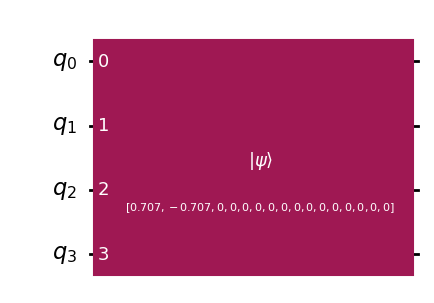

In [70]:
#Let say psiC(0) is the classical solution of the state and psi(0), prepared above is the quantum state.
#since the we are checking for initial states therefore t= 0
x_dot_t = x_dot
mu_t = mu
y_dot_t = np.matmul(np.transpose(x_dot_t),np.sqrt(M))
#quantum representation of the classical state psiC(0)
psiC0 = np.concatenate([y_dot_t,i*np.array(mu_t)])/np.sqrt(2*E)
#padding with zeros
if len(psiC0)<dim: #security measure
    while len(psiC0)!=dim:
        psiC0 = np.append(psiC0,0)
else:
    r("Something went wrong")

#state in quantum circuit
psiC0_cir = QuantumCircuit(int(np.log2(len(psiC0))))
psiC0_cir.initialize(psiC0)
psiC0_cir.draw()


In [71]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

qiskit_runtime_service.__init__:INFO:2024-04-10 15:29:19,338: Default instance: ibm-q-research-2/indian-inst-tech-1/main


In [72]:
backend = service.least_busy(operational=True, simulator=True)
session = Session(service=service, backend=backend)


In [73]:
def cswap_test(input_cir=None,compare_cir = None):
    a=input_cir.num_qubits
    b = compare_cir.num_qubits
    test_cir = QuantumCircuit(a+a+b,a)
    test_cir.h(range(a))
    test_cir = test_cir.compose(input_cir,range(a,a+a))
    test_cir = test_cir.compose(compare_cir,range(a+a,a+a+b))
    #cswaps
    for i in range(a):
        test_cir.cswap(i,a+i,a+a+i)
    test_cir.h(range(a))
    test_cir.measure(range(a),range(a))
    
    nShots = 1024
    #job = execute(circuit, backend, shots=nShots)

    result = Sampler(session = session).run(test_cir).result()

    return test_cir, result 
cir, result = cswap_test(psi0_cir,psiC0_cir)

base_primitive._run_primitive:INFO:2024-04-10 15:29:30,495: Submitting job using options {'optimization_level': 1, 'resilience_level': 0, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 1}}, 'resilience': {'level': 0}, 'execution': {'shots': 4000, 'init_qubits': True}, 'environment': {'log_level': 'WARNING'}, 'simulator': {'noise_model': Unset, 'seed_simulator': Unset, 'coupling_map': Unset, 'basis_gates': Unset}}


In [74]:
#Successfully tested the state to match with classical solution
result.quasi_dists

[{0: 1.0}]

## Method 2 : State Tomography

In [76]:
pip install qiskit-experiments

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.5/733.5 kB 870.6 kB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 69.2 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 155.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 122.5 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.3/491.3 kB 670.2 kB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [93]:
from qiskit_experiments.library import StateTomography
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import FakePerth, FakeOsaka

In [94]:
backend = AerSimulator.from_backend(FakeOsaka())
qstexp1 = StateTomography(psi0_cir)
qstdata1 = qstexp1.run(backend, seed_simulation=100).block_for_results()

In [112]:
state_result = qstdata1.analysis_results("state")
ext_state_vec = state_result.value.to_statevector(atol=1e-1, rtol=1e-2).data

Extracting the values from state_vector

In [129]:
#extracting terms from state vector
ext_y_dot_t = ext_state_vec[:N] #momentum term
ext_mu_t = ext_state_vec[N:N+int(N*(N+1)/2)]

#with this padding is also removed

In [131]:
velocity = []
for i in range(len(ext_y_dot_t)):
    velocity.append(np.sqrt(2*E)*ext_y_dot_t[i]/np.sqrt(M[i][i]))

In [146]:
position = []
for i in range(int(N*(N-1)/2),int(N*(N+1)/2)):
    if K[int(i-N*(N-1)/2)][int(i-N*(N-1)/2)] ==0:
        position.append(0)
    else:
        position.append(np.sqrt(2*E)*ext_mu_t[i]/np.sqrt(K[int(i-N*(N-1)/2)][int(i-N*(N-1)/2)]))

In [149]:
print("Values of Dynamic Variables at time t after extarcting using state tomography")
print("position vector:",position)
print("velcoity vector:",velocity)

Values of Dynamic Variables at time t after extarcting using state tomography
position vector: [(0.002837172933950402+0.015413056393039573j), 0, 0, 0]
velcoity vector: [(-0.9979041167497028-0.02616568079882552j), (0.9998707581288575+0j), (0.00182377550996259-0.0007969552439216539j), (0.00053942891429274+0.012700055280760502j)]
